# Digital Image Processing - Lab Project 2

## Convolutional Neural Networks - Multi-class Classification

This Colab Notebook was created in the context of the course Digital Image Processing from 8th semester at EECE DUTh.

This is the second Lab Project, which was requested at that course.

The purpose of this Project was to train a convolutional neural network (CNN), on the famous image dataset CIFAR10 efficiently enough. The wanted result was to succeed a final accuracy near 80% on testing data. Data augmentation was not allowed to be used. 

The following parameters could be changed:


> *   batch size 
*   epochs 
* At conv2d layer:
  * number of kernels
  * activation function type
* dropout
*  deletion or modification of layers at the fully connected layer
* At the optimizer:
  * learning rate 
  * decay









The final accuracy on test data, the network had succeeded was 79,06% . 

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

batch_size = 90 
num_classes = 10
epochs = 200

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),  activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh', input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3),  activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(2, 2), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(512, (3, 3),  activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))


opt = keras.optimizers.rmsprop(lr=0.0005, decay=1e-3)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 145us/step - loss: 1.7721 - accuracy: 0.3506 - val_loss: 1.3495 - val_accuracy: 0.5057
Epoch 2/200
50000/50000 [==============================] - 7s 135us/step - loss: 1.3363 - accuracy: 0.5224 - val_loss: 1.2730 - val_accuracy: 0.5608
Epoch 3/200
50000/50000 [==============================] - 7s 135us/step - loss: 1.1598 - accuracy: 0.5895 - val_loss: 1.1705 - val_accuracy: 0.6020
Epoch 4/200
50000/50000 [==============================] - 7s 135us/step - loss: 1.0545 - accuracy: 0.6239 - val_loss: 0.9749 - val_accuracy: 0.6601
Epoch 5/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.9740 - accuracy: 0.6557 - val_loss: 0.9936 - val_accuracy: 0.6604
Epoch 6/200
50000/50000 [==============================] - 7s 136us/step - loss: 0.9126 - accuracy: 0.6779 - val_loss: 0.8929 - val_

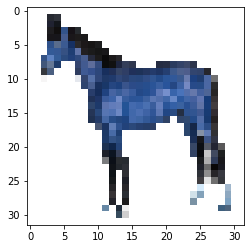

[[6.1177734e-09 1.4026222e-13 3.3546266e-11 2.2242799e-10 1.3898828e-08
  9.7508163e-08 8.8373023e-15 9.9999988e-01 1.6170957e-13 6.8572495e-11]]
The image is 7


In [ ]:
from matplotlib import pyplot as plt
import cv2
img = cv2.imread('horse1.jpg')
newimg = cv2.resize(img,(32,32))
plt.imshow(newimg)
plt.show()
im2arr = newimg.reshape(1,32,32,3)
y_pred = model.predict(im2arr)
print(y_pred)
number = np.argmax(y_pred)
print ('The image is', number)
